# An Intro to Arvo (and bits of music21)

This is mostly me going through the arvo [intro video](https://www.youtube.com/watch?v=qxB7r4hnEL8&t=23s).

I also pulled a few ideas some other resources, for example
- [this intro to music21, which I ought to go through fully later](https://opencomputinglab.github.io/SubjectMatterNotebooks/music/overview.html).
- [this page in the music21 docs](https://web.mit.edu/music21/doc/usersGuide/usersGuide_02_notes.html)


In [25]:
import subprocess

from music21 import environment
from arvo import tools

user_settings = environment.UserSettings()

# Find musescore provided via nix flakes
MUSESCORE_EXE = subprocess.check_output(["which", "mscore."]).strip().decode()
MUSESCORE_DIR = MUSESCORE_EXE.removesuffix('/bin/mscore.')
MUSESCORE_APP = MUSESCORE_DIR + "/Applications/mscore.app/"
user_settings["musicxmlPath"] = MUSESCORE_APP
user_settings["musescoreDirectPNGPath"] = MUSESCORE_EXE

# Find lilypond provided via nix flakes
LILYPOND_EXE = subprocess.check_output(["which", "lilypond"]).strip().decode()
LILYPOND_VERSION = subprocess.check_output(["lilypond", "--version"]).strip().decode().split()[2]
user_settings["lilypondPath"] = LILYPOND_EXE
user_settings["lilypondVersion"] = LILYPOND_VERSION

dict(user_settings)


{'directoryScratch': None,
 'lilypondPath': PosixPath('/nix/store/y017wa4qn8dyjd2sjq6q4rldr2yy8mrc-lilypond-2.24.2/bin/lilypond'),
 'lilypondVersion': '2.24.2',
 'lilypondFormat': 'pdf',
 'lilypondBackend': 'ps',
 'musicxmlPath': PosixPath('/nix/store/b8pajm2klsq44al4500b5ycg2q9hrrr3-musescore-4.1.1/Applications/mscore.app'),
 'midiPath': PosixPath('/Applications/GarageBand.app'),
 'graphicsPath': PosixPath('/System/Applications/Preview.app'),
 'vectorPath': PosixPath('/System/Applications/Preview.app'),
 'pdfPath': PosixPath('/System/Applications/Preview.app'),
 'braillePath': None,
 'musescoreDirectPNGPath': PosixPath('/nix/store/b8pajm2klsq44al4500b5ycg2q9hrrr3-musescore-4.1.1/bin/mscore.'),
 'showFormat': 'musicxml',
 'writeFormat': 'musicxml',
 'ipythonShowFormat': 'ipython.musicxml.png',
 'autoDownload': 'ask',
 'debug': 0,
 'warnings': '1',
 'localCorpusSettings': LocalCorpusSettings([]),
 'localCorporaSettings': {},
 'manualCoreCorpusPath': None,
 'localCorpusPath': None}

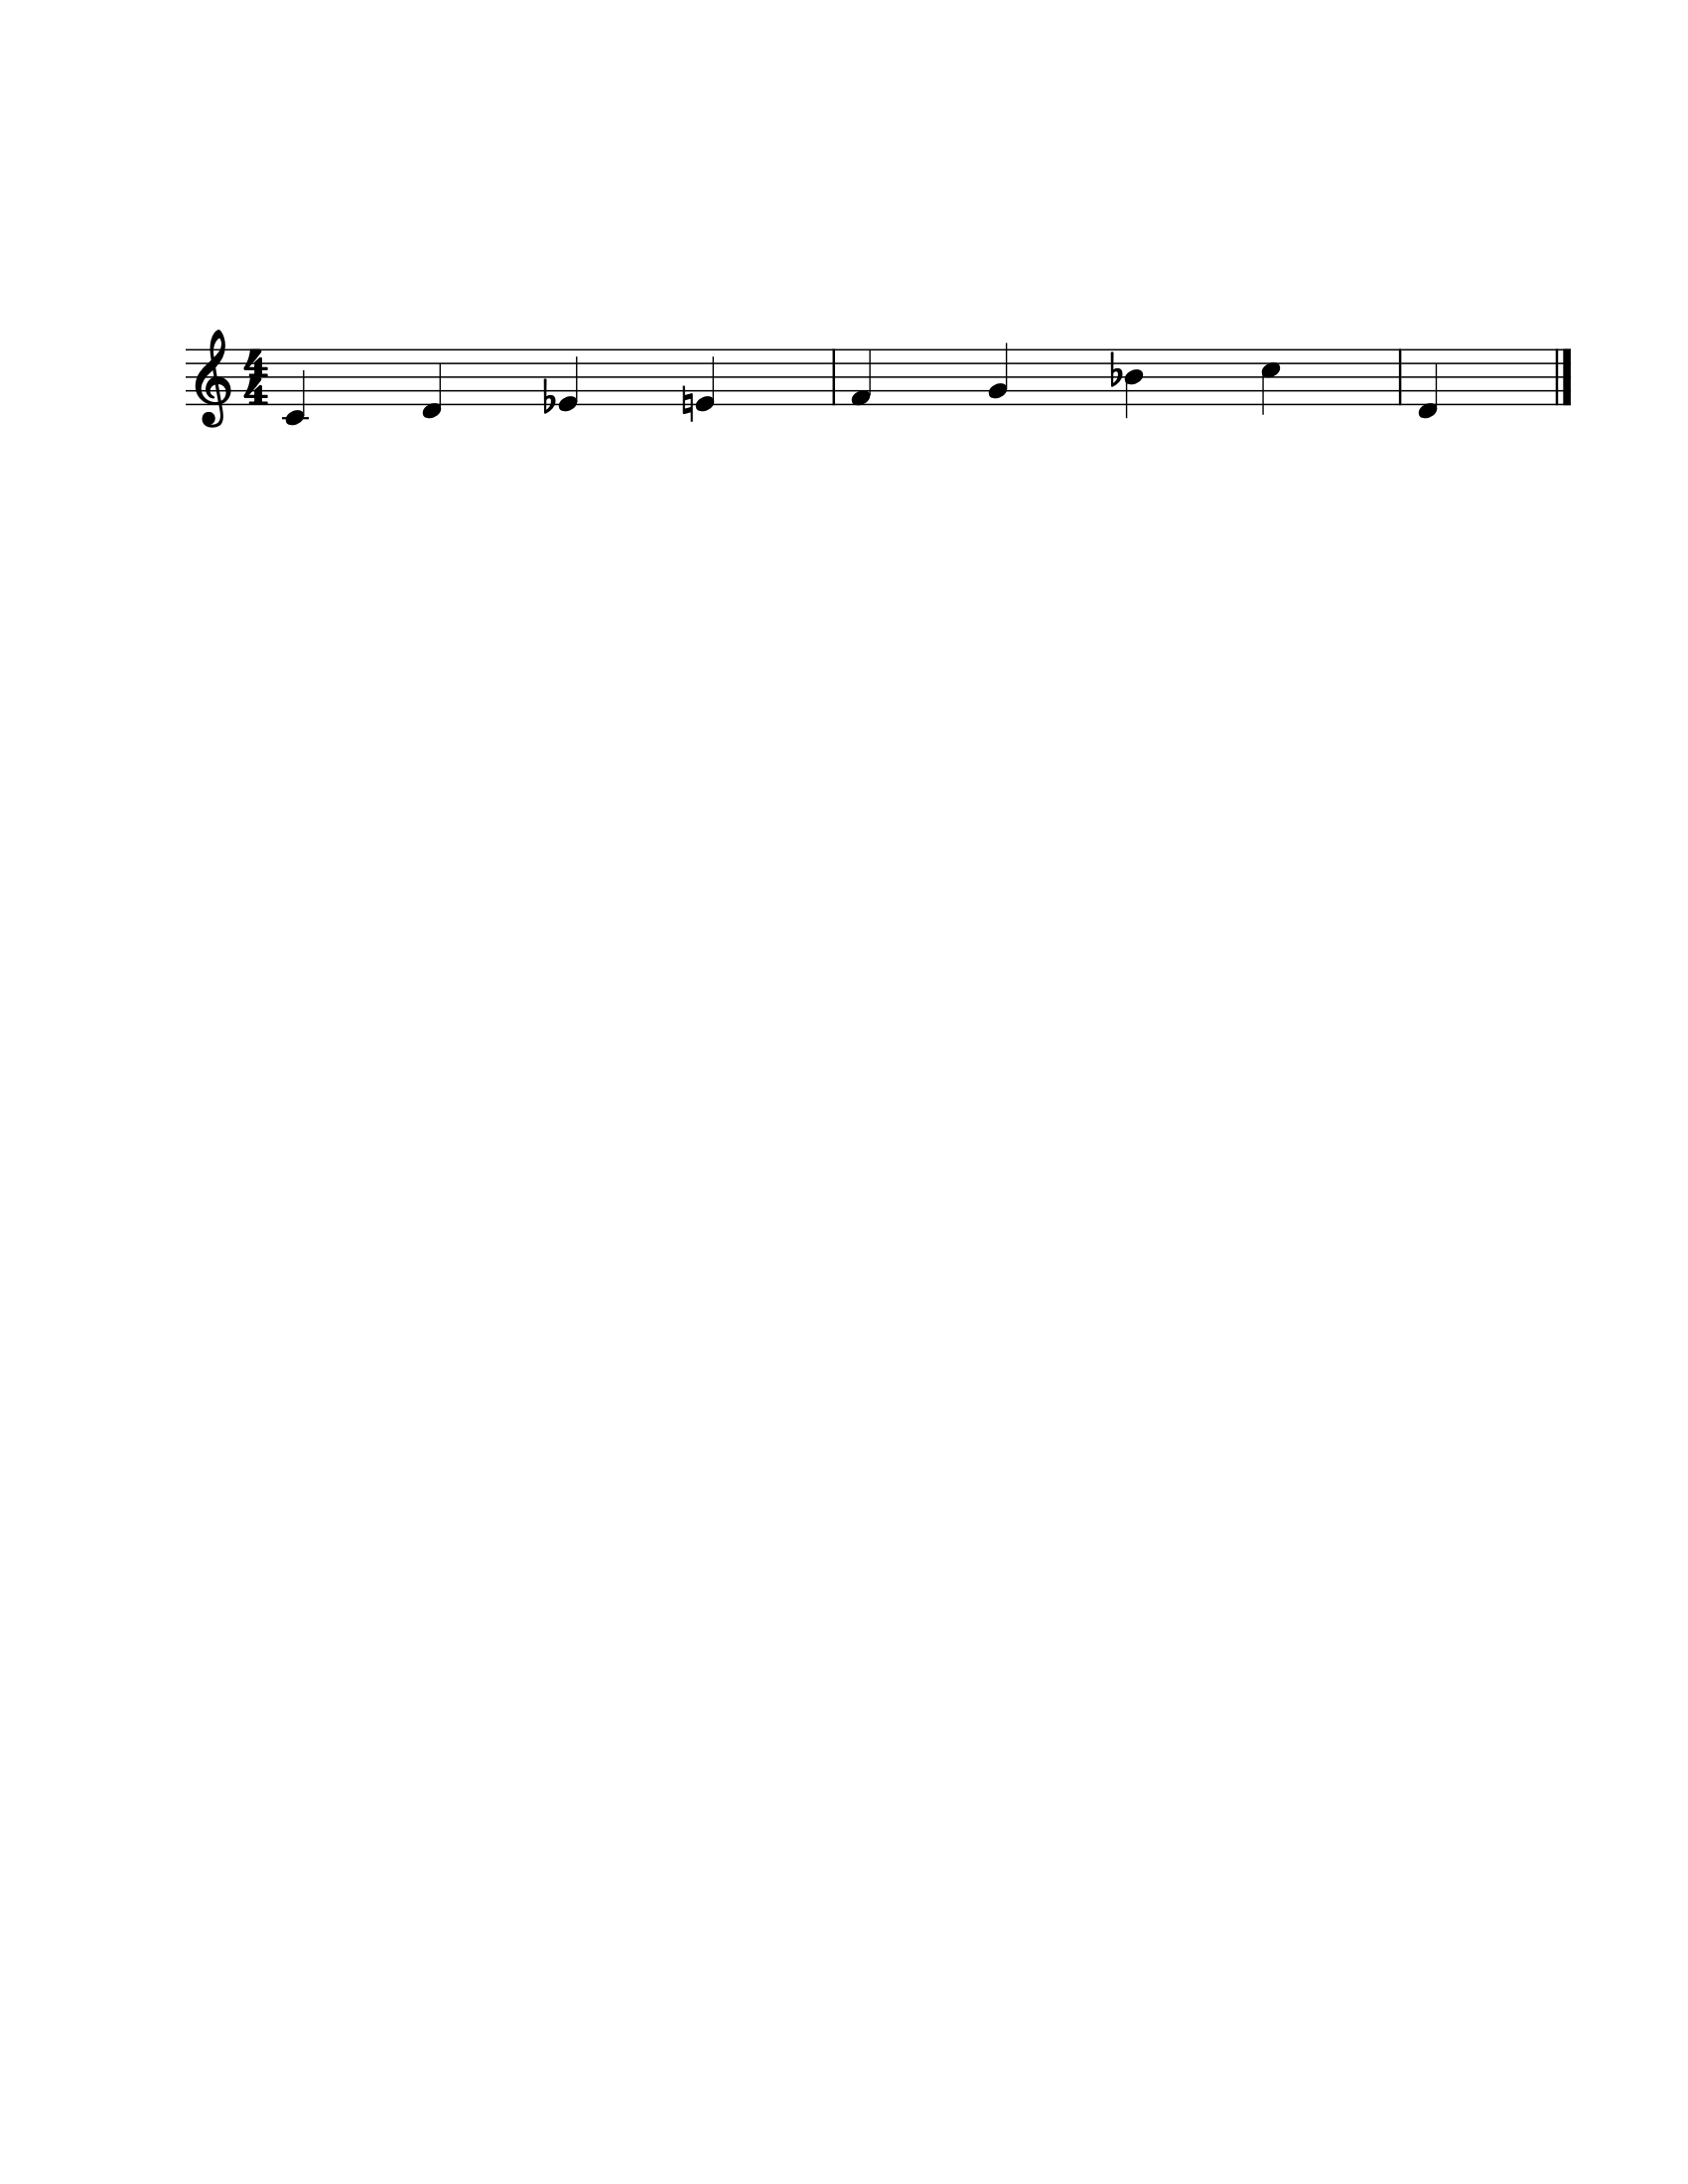

In [6]:
# (By default, notes are in octave 4)
melody = tools.notes_to_stream(["C4", "D4", "Eb", "E", "F", "G", "Bb", "C5", "D"])

# default show() will open it inline, although the format is a bit ugly (it sizes for a full page of music!)
melody.show()

In [7]:
from arvo import minimalism, isorhythm

# Same melody as before
melody = tools.notes_to_stream(["C4", "D4", "Eb", "E", "F", "G", "Bb", "C5", "D"])

# recombine chunks of the melody into a longer stream
melody_1 = minimalism.additive_process(melody)

# redefine the rhythmic behavior via isorhythm
durations = tools.durations_to_stream([2, 1, .5, .5, 1, .5, .5, .5, 1, .5])  # (here 1 is a quarter note)
melody_2 = isorhythm.create_isorhythm(melody_1, durations)

melody_2.show(fmt="musicxml")

/Users/stroxler/.local/share/virtualenvs/first-steps-OGxOD9mY/lib/python3.11/site-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


/Users/stroxler/.local/share/virtualenvs/first-steps-OGxOD9mY/lib/python3.11/site-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


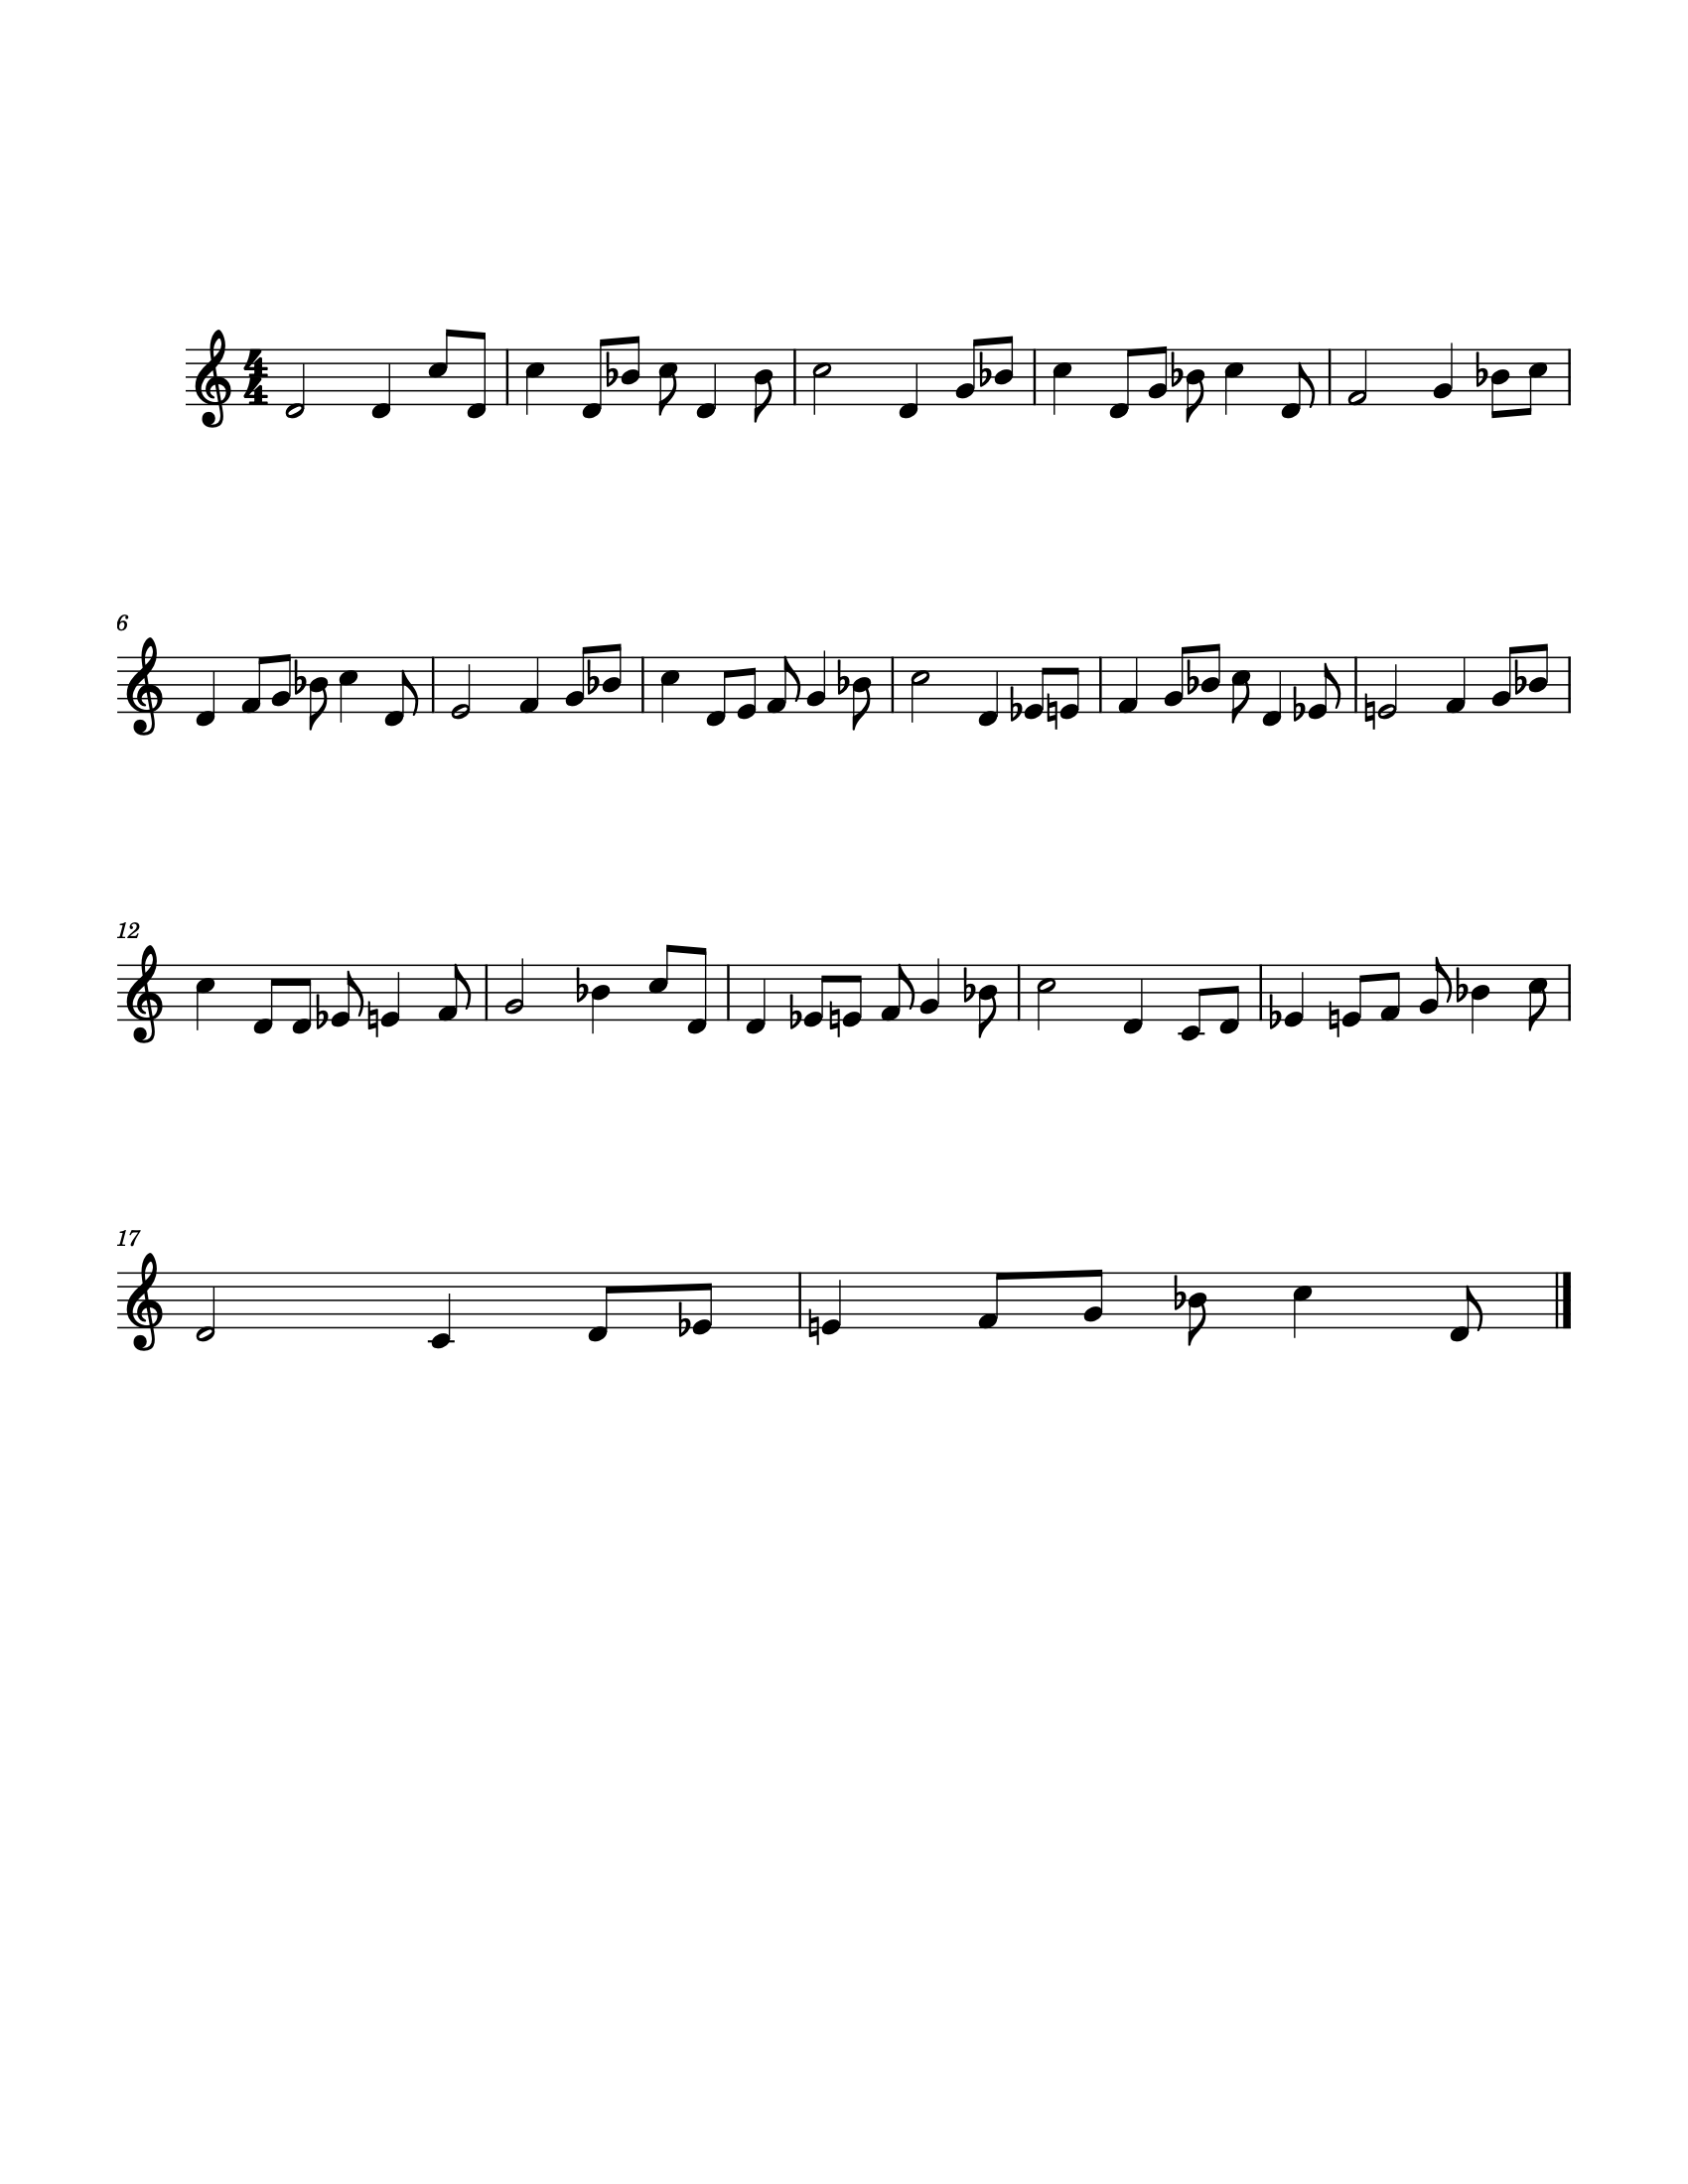

In [62]:
# Do it all over again, using a backward additive process with more repetition.
# ... There are a few other options you can try for `direction`

melody = tools.notes_to_stream(["C4", "D4", "Eb", "E", "F", "G", "Bb", "C5", "D"])
melody_1 = minimalism.additive_process(melody, direction=minimalism.Direction.BACKWARD, repetitions=2)
durations = tools.durations_to_stream([2, 1, .5, .5, 1, .5, .5, .5, 1, .5])  # (here 1 is a quarter note)
melody_2 = isorhythm.create_isorhythm(melody_1, durations)
melody_2.show()

# NOTE: I ought to submit a PR on arvo to fix the call to .flat!

In [33]:
# Midi playback avoids putting musescore in the loop
#   You can get it natively in python - handy for little snippets - or export to a real synth
#   Obvious options for a synth: Supercollider, Ableton

from music21 import midi

# So far unfortunately I haven't figured out how to *stop* playback, so be careful with this!
#   It's one reason to prefer the musescore / musicxml approach for longer melodies (melody_2 takes a while)
sound = midi.realtime.StreamPlayer(melody)
sound.play()

# You could run this path through any other midi player as an alternative:
melody.write(fmt="midi")

PosixPath('/var/folders/6f/blcmbtn90qd77r_gw4v0d3fw0000gn/T/music21/tmp3_c3i4t_.mid')

In [8]:
# You can get the ability to interrupt playback by using IPython midi player:
melody.show(fmt="midi")

In [60]:
# Unfortunately this doesn't work :(
'''
path = melody.write(fmt="vexflow")
with open(path) as f:
    html = f.read()

from IPython.core.display import HTML
HTML("<iframe>" + html + "</iframe>")

from IPython.display import IFrame
IFrame(src="file://" + str(path), width=700, height=600)
'''

'\npath = melody.write(fmt="vexflow")\nwith open(path) as f:\n    html = f.read()\n\nfrom IPython.core.display import HTML\nHTML("<iframe>" + html + "</iframe>")\n\nfrom IPython.display import IFrame\nIFrame(src="file://" + str(path), width=700, height=600)\n'

In [68]:
from music21 import converter

# Another way to insert music is using tinyNotation

melody = converter.parse('tinyNotation: 4/4 C4 D2 E4 F4 G4 A4 B4 c4')
melody.show(fmt="midi")

In [9]:
# Another demo from the video: retrograde
from arvo import transformations

melody = tools.notes_to_stream(["C4", "D4", "Eb", "E", "F", "G", "Bb", "C5", "D"])
melody_1 = melody  # copy for mutation
melody_1.append(transformations.retrograde(melody))
melody_1.show(fmt="text")

{0.0} <music21.note.Note C>
{1.0} <music21.note.Note D>
{2.0} <music21.note.Note E->
{3.0} <music21.note.Note E>
{4.0} <music21.note.Note F>
{5.0} <music21.note.Note G>
{6.0} <music21.note.Note B->
{7.0} <music21.note.Note C>
{8.0} <music21.note.Note D>
{9.0} <music21.stream.Stream 0x11add1310>
    {0.0} <music21.note.Note D>
    {1.0} <music21.note.Note C>
    {2.0} <music21.note.Note B->
    {3.0} <music21.note.Note G>
    {4.0} <music21.note.Note F>
    {5.0} <music21.note.Note E>
    {6.0} <music21.note.Note E->
    {7.0} <music21.note.Note D>
    {8.0} <music21.note.Note C>


/Users/stroxler/.local/share/virtualenvs/first-steps-OGxOD9mY/lib/python3.11/site-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [10]:
# need to read up on what this really is...
from arvo import tintinnabuli

melody = tools.notes_to_stream(["C4", "D4", "Eb", "E", "F", "G", "Bb", "C5", "D"])
melody_1 = tintinnabuli.create_t_voice(
    melody,
    ["C", "Eb", "G"],
    position=2,
    direction=tintinnabuli.Direction.DOWN,
)
melody_1.show(fmt="text")

# ... by the end of the video, he actually has something that reminds me
# of a really cool TidalCycles loop rather than a music theory thing which is interesting.

{0.0} <music21.note.Note E->
{1.0} <music21.note.Note G>
{2.0} <music21.note.Note G>
{3.0} <music21.note.Note C>
{4.0} <music21.note.Note C>
{5.0} <music21.note.Note C>
{6.0} <music21.note.Note E->
{7.0} <music21.note.Note E->
{8.0} <music21.note.Note G>


In [26]:
# Sadly I think there's a version mismatch or something, lilypond support is broken
# as of my current pipfile and flake locks; setting the version didn't seem to help :/
'''
melody.show("lilypond")
'''
# This could be worth looking into eventually (maybe some OSS contributions) but for now
# honestly the built-in show/midi + the musescore musicxml export are probably better anyway

Fontconfig error: Cannot load default config file: No such file: (null)
Fontconfig error: Cannot load default config file: No such file: (null)
Fontconfig error: No writable cache directories
Fontconfig error: No writable cache directories
Fontconfig error: No writable cache directories
Fontconfig error: No writable cache directories
Fontconfig error: No writable cache directories
Changing working directory to: `/var/folders/6f/blcmbtn90qd77r_gw4v0d3fw0000gn/T/music21'
Processing `/var/folders/6f/blcmbtn90qd77r_gw4v0d3fw0000gn/T/music21/tmpjiwc5tzo.ly'
Parsing...
/var/folders/6f/blcmbtn90qd77r_gw4v0d3fw0000gn/T/music21/tmpjiwc5tzo.ly:33:5: error: unknown escaped string: `\RemoveEmptyStaffContext'
    
    \RemoveEmptyStaffContext
/var/folders/6f/blcmbtn90qd77r_gw4v0d3fw0000gn/T/music21/tmpjiwc5tzo.ly:34:5: error: syntax error, unexpected \override, expecting '='
    
    \override VerticalAxisGroup #'remove-first = ##t
/var/folders/6f/blcmbtn90qd77r_gw4v0d3fw0000gn/T/music21/tmpjiwc5tz

LilyTranslateException: cannot find tmpjiwc5tzo.ly.png or the full path /var/folders/6f/blcmbtn90qd77r_gw4v0d3fw0000gn/T/music21/tmpjiwc5tzo.ly.png original file was /var/folders/6f/blcmbtn90qd77r_gw4v0d3fw0000gn/T/music21/tmpjiwc5tzo.ly

In [22]:
dict(user_settings)

{'directoryScratch': None,
 'lilypondPath': PosixPath('/nix/store/y017wa4qn8dyjd2sjq6q4rldr2yy8mrc-lilypond-2.24.2/bin/lilypond'),
 'lilypondVersion': "GNU LilyPond 2.24.2 (running Guile 2.2)\n\nCopyright (c) 1996--2023 by\n  Han-Wen Nienhuys &lt;hanwen@xs4all.nl&gt;\n  Jan Nieuwenhuizen &lt;janneke@gnu.org&gt;\n  and others.\n\nThis program is free software.  It is covered by the GNU General Public\nLicense and you are welcome to change it and/or distribute copies of it\nunder certain conditions.  Invoke as `lilypond --warranty' for more\ninformation.",
 'lilypondFormat': 'pdf',
 'lilypondBackend': 'ps',
 'musicxmlPath': PosixPath('/nix/store/b8pajm2klsq44al4500b5ycg2q9hrrr3-musescore-4.1.1/Applications/mscore.app'),
 'midiPath': PosixPath('/Applications/GarageBand.app'),
 'graphicsPath': PosixPath('/System/Applications/Preview.app'),
 'vectorPath': PosixPath('/System/Applications/Preview.app'),
 'pdfPath': PosixPath('/System/Applications/Preview.app'),
 'braillePath': None,
 'musesco